##Linear Regression Exercise

In this exercise, we will be predicting the median housing price in an area given certain attributes that describe area. We will be working with california housing prices dataset. Each sample in the dataset corresponds to an area in california. The attributes are latitude, longitude, median age of houses in the area (in years), total number of rooms in the area, total number of bed rooms in the area, population of the area, number of households in the areas, median income in the area (in tens of thousands of dollars), the area's proximity to ocean and the median house value.

###Get Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#HOUSING_PATH = "/content/drive/MyDrive/myLMSCourses/ML/2021_22_evenSemBatch/Practicals/1_exercise1/"
HOUSING_PATH = "/content/drive/My Drive/Colab Notebooks/" #upload the housing.tgz file into the drive and give the path here


In [ ]:
import os
import tarfile
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  tgz_path = os.path.join(housing_path, "housing.tgz")
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()

###Peek into Data

In [ ]:
# look at the top five rows of data using dataframe's head method
# Your code below
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Get a quick description of data using dataframe's info method; make a note of attributes with missing values in this notebook below this cell using a markdown cell.
# Your code below
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The column total_bedrooms has missing values, with 20433 non-null entries out of 20640 total entries.

In [ ]:
# What kind of attribute is ocean_proximity? Discrete or continuous? If discrete, use value_counts method on the column corresponding
# to ocean_proximity and get a description?
# Your code below
ocean_proximity_count=housing["ocean_proximity"].value_counts()
print(ocean_proximity_count)
ocean_proximity_count.describe()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


count       5.000000
mean     4128.000000
std      3656.817811
min         5.000000
25%      2290.000000
50%      2658.000000
75%      6551.000000
max      9136.000000
Name: count, dtype: float64

Ocean Proximity is a descreate value

In [ ]:
# Use describe method on the dataframe to get a summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


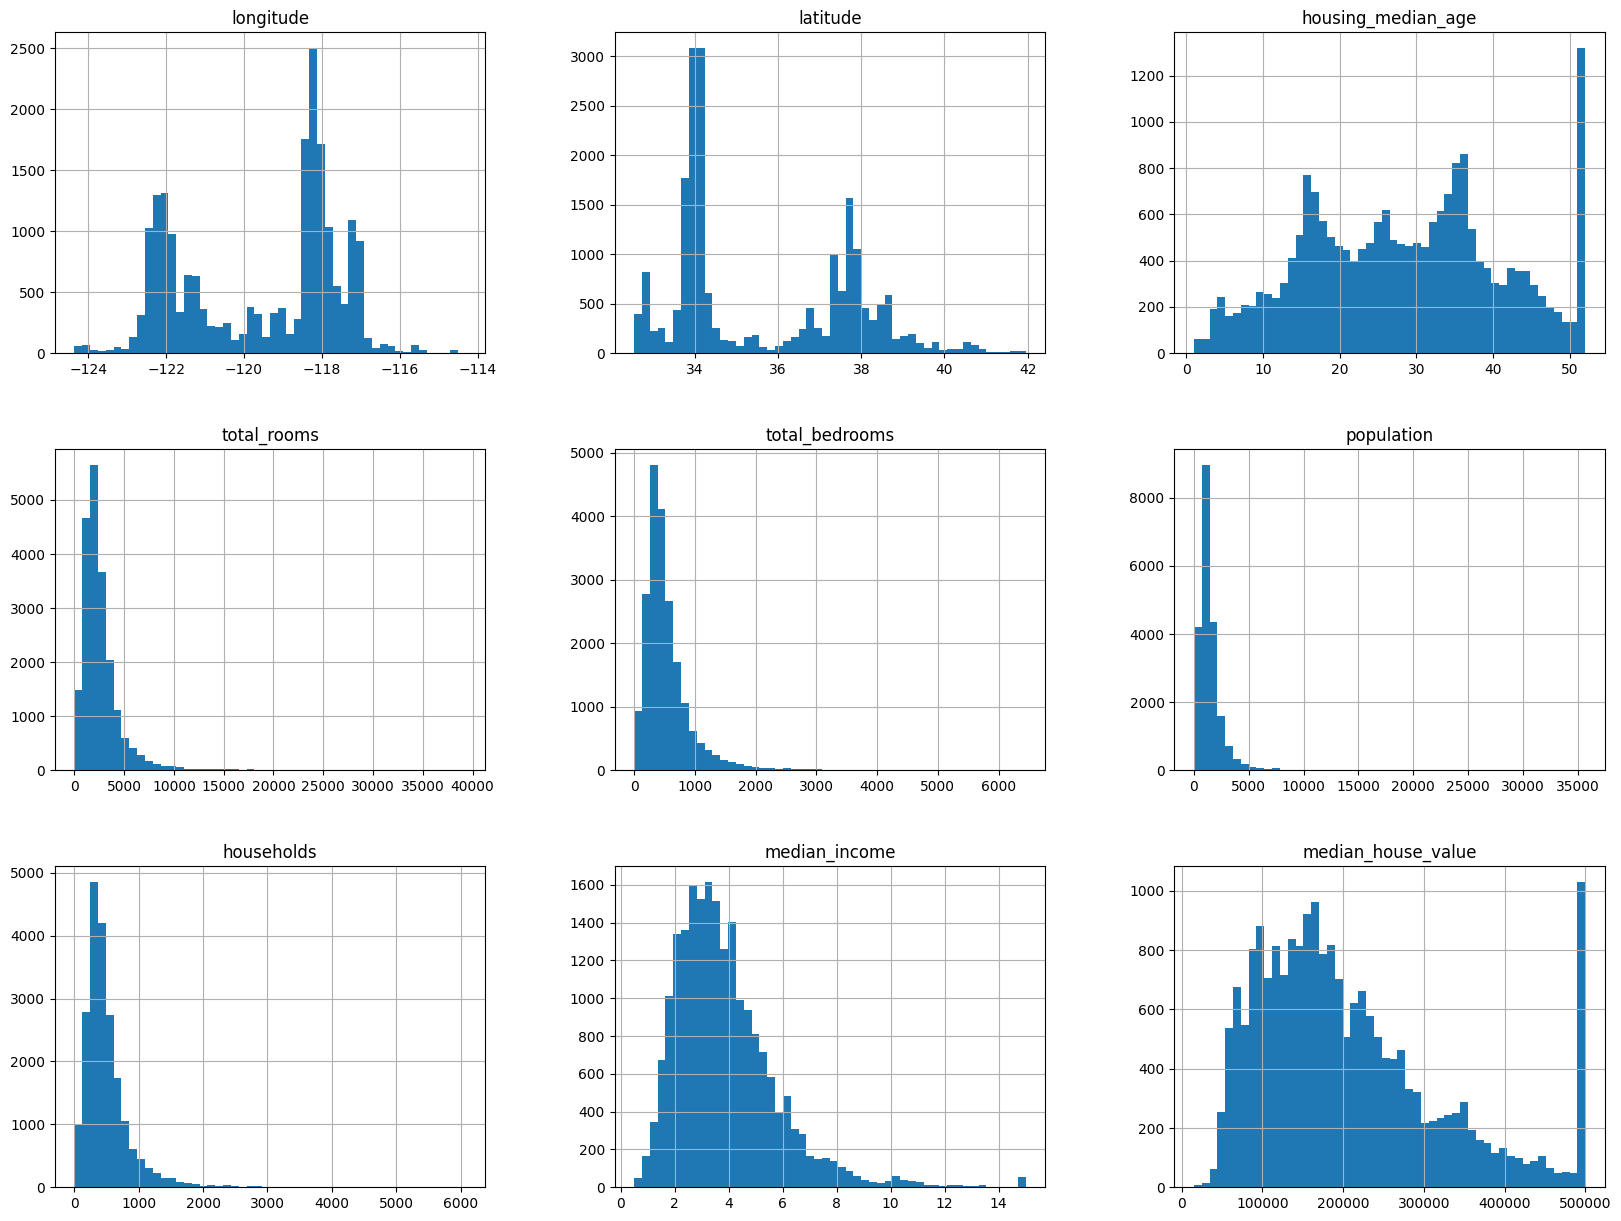

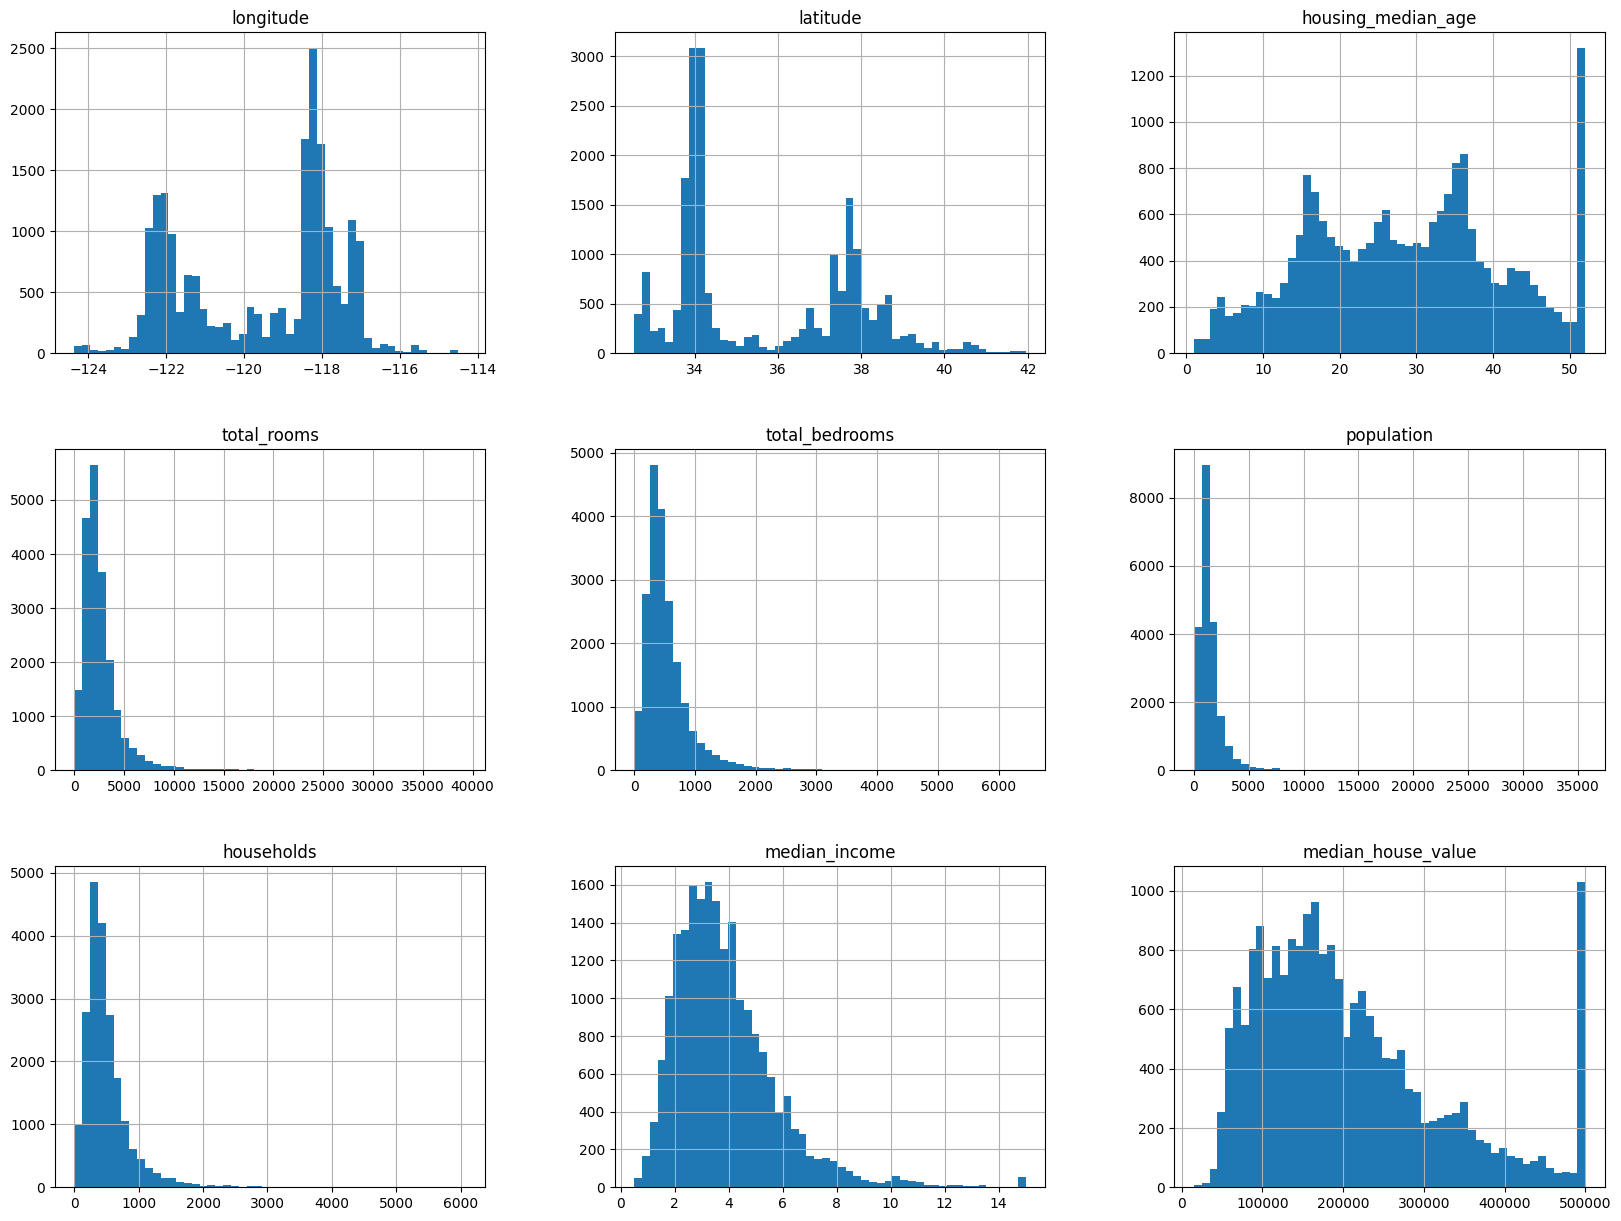

In [ ]:
# Numerical attributes can also be described using histograms
# Observe how many attributes are thick tailed? What about the scales of the attributes? Are they uniform or vastly different?
%matplotlib inline
import matplotlib.pyplot as plt
#use hist method on dataframe
# Your code below
housing.hist(bins=50,figsize=(20,15))
plt.show()


Thick-tailed distributions: Attributes such as total_rooms, total_bedrooms, population, and households exhibit thick-tailed distributions. These distributions have a long tail on the right side, indicating that there are a significant number of entries with very high values.


Observation on Scales of Attributes:

The scales of the attributes in the California Housing Prices dataset vary widely. For example, `median_income` ranges from 0 to 15, while `housing_median_age` ranges from 0 to about 50. `Total_rooms` and `total_bedrooms` are in the thousands, and `median_house_value` goes up to 1000 (which means $500,000). Because of these differences, some attributes may need to be scaled or normalized before using machine learning algorithms.

###Create Test Data
Why create test set now, right at the beginning? The reason is to avoid data snooping bias. That is, the more we look into data, our brain is powerful to capture the pattern seen in that data and will naturally influence our choice of the model. But that model may not generalize well during deployment since it was chosen simply based on some pattern seen in some sample data. So, it is better to separate out test set right in the beginning and keep it only for testing. We can do a pure random split of data into train and test set. For this you can look at train_test_split class in sklearn.model_selection. But, suppose your manager told that median income is an important attribute for predicting house price. Then, you would want to split data so that it reflects the various categories of median income in both train and test data. This is called as stratified sampling. Of course, median income is right now a numeric attribute. You have to create a new categorical attribute called income_cat, use that to split data into train and test sets, and then remove the income_cat attribute. To create income_cat, we can look at its respective histogram above and find that most median incomes are clustered around 1.5-6 (i.e \$15000-\$60000). So our categories could be 0-1.5, 1.5-3, 3-4.5, 4.5-6, >6.

In [ ]:
import numpy as np
# create income_cat attribute as described above
#housing["income_cat"] = # fill the code here; use cut method in pandas
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, float('inf')],
                               labels=[1, 2, 3, 4, 5])



print(housing[["median_income", "income_cat"]].head())

   median_income income_cat
0         8.3252          5
1         8.3014          5
2         7.2574          5
3         5.6431          4
4         3.8462          3


In [ ]:
# create train test stratified split (80-20 split) using income_cat attribute; use the train_test_split() method in sklearn.model_selection module
from sklearn.model_selection import train_test_split
X=housing['income_cat']
y=housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=housing["income_cat"], random_state=42)

# Your code below


In [ ]:
# to check if the stratified split worked, compute and display the proportions of income categories in the test set and the whole dataset, and compare
# and make your observations in a markdown cell below.
# Calculate the proportions of income categories in the whole dataset
income_cat_proportions = housing['income_cat'].value_counts(normalize=True)

# Calculate the proportions of income categories in the test set
test_income_cat_proportions = y_test.value_counts(normalize=True)

# Display the proportions
print("Proportions of income categories in the whole dataset:")
print(income_cat_proportions)

print("\nProportions of income categories in the test set:")
print(test_income_cat_proportions)


Proportions of income categories in the whole dataset:
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: proportion, dtype: float64

Proportions of income categories in the test set:
median_house_value
500001.0    0.043362
162500.0    0.006298
112500.0    0.005572
225000.0    0.005329
137500.0    0.004845
              ...   
284400.0    0.000242
324300.0    0.000242
379500.0    0.000242
184500.0    0.000242
215600.0    0.000242
Name: proportion, Length: 2180, dtype: float64


By comparing the proportions of income categories in the whole dataset with those in the test set, we can see that the stratified split has successfully maintained the distribution of income categories. This ensures that the test set is representative of the whole dataset, which is crucial for making accurate and reliable predictions.

In [ ]:
# drop the income_cat attribute from both train and test set; use dataframes's drop method
# Your code below
# Drop the income_cat attribute from both train and test set
X_train = X_train.drop(columns=['income_cat'], axis=1)
X_test = X_test.drop(columns=['income_cat'], axis=1)

# Combine X_train and y_train back to a DataFrame for convenience
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

print("Train Set:")
print(train_set)
print("\nTest Set:")
print(test_set)


Train Set:
      income_cat  median_house_value
12655          2             72100.0
15502          5            279600.0
2908           2             82700.0
14053          2            112500.0
20496          3            238300.0
...          ...                 ...
15174          4            268500.0
12661          2             90400.0
19263          3            140400.0
19140          3            258100.0
19773          3             62700.0

[16512 rows x 2 columns]

Test Set:
      income_cat  median_house_value
5241           5            500001.0
17352          4            162500.0
3505           3            204600.0
7777           3            159700.0
14155          3            184000.0
...          ...                 ...
12182          2            110000.0
7275           2            118800.0
17223          4            293800.0
10786          4            335700.0
3965           3            215600.0

[4128 rows x 2 columns]


### Explore Data
We will explore train data more to gain more insights. We will not touch test data. It will only be used at the end when we build a model and we are ready to test it. Even for exploring train set, to be on the safer side, we will make a copy of it. We will first visualize train data using scatter plot. See the plot below carefully. A lot of information has been embedded into it. Answer the questions given in comments.

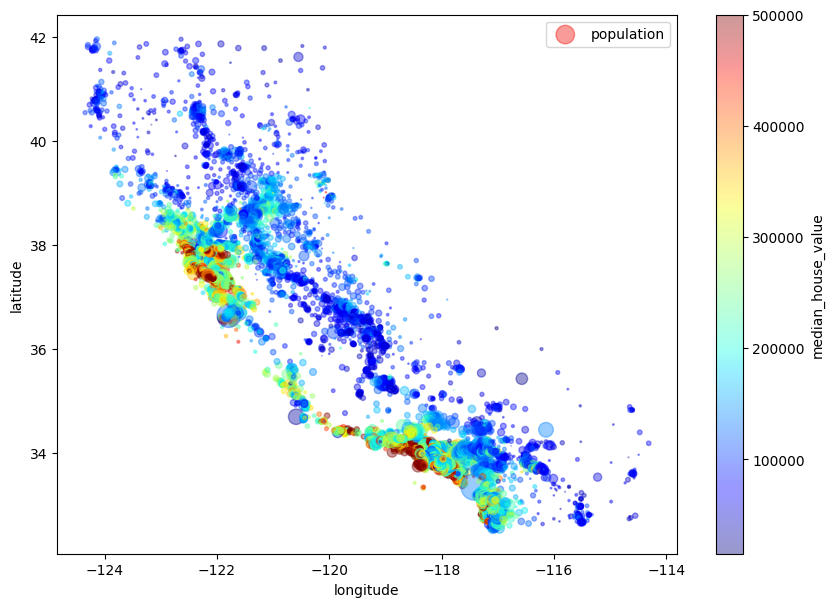

In [ ]:
start_train_set=housing.copy()
housing = start_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

# What does the size of the scatter point indicate? What does the color of the scatter point indicate? What is the relationship
#
# between ocean_proximity and median_house_value (note that the ocean is towards the bottom left in the plot)? Is there relationship between population and median_house_value?

# Describe the role of alpha parameter in the dataframe's plot method.

In the scatter plot, the size of the points indicates the population, with larger points representing higher populations. The color of the points shows the median house value, ranging from blue for lower values to red for higher values. Houses closer to the ocean generally have higher values, while there isn't a strong relationship between population and house values. The `alpha` parameter controls the transparency of the points, helping to visualize overlapping areas more clearly.

We will now look at linear correlations between median_house_value and all other attributes. Complete the code below  and answer the questions given in comments. In case you are not familiar with the concept of Perason's correlation, read about it.

In [ ]:
# use dataframe's corr method to get correlation matrix of every pair of attributes
# fill code here
numeric_housing = housing.select_dtypes(include=[float, int])
corr_matrix =numeric_housing.corr()
# Display the sorted correlations
median_house_value_corr = corr_matrix['median_house_value'].sort_values(ascending=False)



# extract only median_house_value column from corr_matrix and sort it in descending order
# for sorting, use pandas series method sort_values
# Your code below
print("Sorted Correlations with median_house_value:")

print(median_house_value_corr)



# Which attribute correlates positively highly with median_house_value? Are there attributes which have negligible linear correlations
# with median_house_value? What about negative linear correlations? Does a correlation value of zero or close to zero mean absolutely no relationship?

Sorted Correlations with median_house_value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


The attribute `median_income` has the highest positive correlation with `median_house_value`. Attributes like `housing_median_age` and `total_rooms` show negligible linear correlations with house values, while `total_bedrooms` and `population` may have negative correlations. A correlation near zero suggests a weak or no linear relationship, but non-linear relationships might still exist.

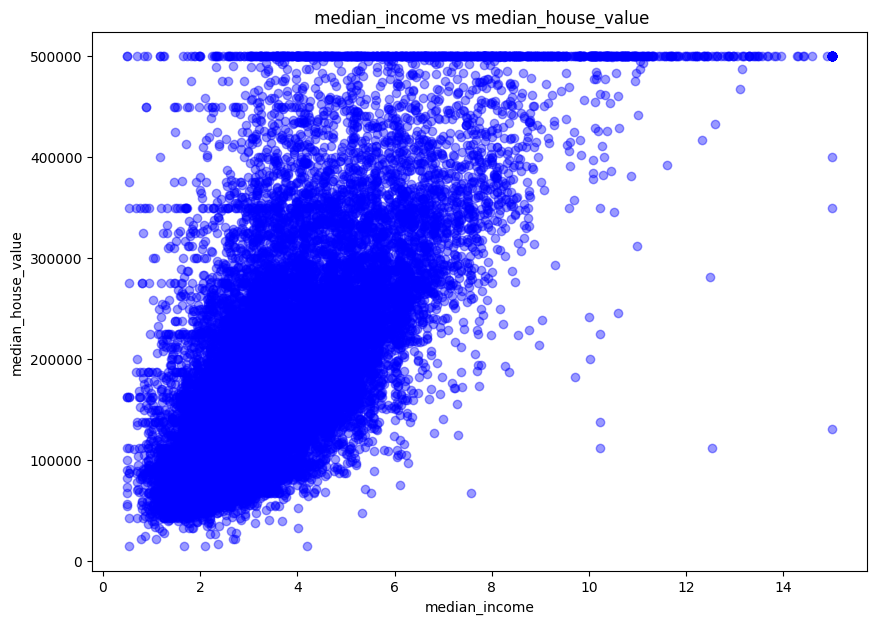

In [ ]:
 # Since median_income highly correlates with median_house_value, let's focus on that.
 # Display a scatter plot of median_income vs median_house_value
 # Your code below
plt.figure(figsize=(10,7))
plt.scatter(housing['median_income'],housing['median_house_value'],alpha=0.9,c='blue')
plt.title(' median_income vs median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

 # Does the plot reveal anything? Change alpha value and see.

The scatter plot shows a strong positive relationship between `median_income` and `median_house_value`; as income increases, house values also rise. Adjusting the `alpha` value changes point transparency, with lower alpha making dense areas more visible and higher alpha making the plot less transparent and potentially more cluttered.

In [ ]:
# Attribute like total_rooms, total_bedrooms, population are too general to relate to house price
# Above correlations also show this
# Why not create population per household, rooms per household, ratio of bed_rooms to rooms?
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] =housing["population"] / housing["households"]

Creating new attributes like `rooms_per_household`, `bedrooms_per_room`, and `population_per_household` can provide more insightful relationships with house prices. These derived metrics can help clarify the data by focusing on the ratios and proportions, which might better capture the impact of housing conditions on prices.

In [ ]:
# Now see the correlations of median_house_value to all the attributes including new attributes introduced above
# Your code below
# Compute correlation matrix including new attributes
numeric_column = housing.select_dtypes(include=[np.number])
corr_matrix =numeric_column.corr()

# Display correlations with median_house_value
median_house_value_corr = corr_matrix['median_house_value'].sort_values(ascending=False)

print("Correlation with median_house_value:")
print(median_house_value_corr)


# Any new observations ??


Correlation with median_house_value:
median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


The new attributes reveal more nuanced relationships with `median_house_value`.'median_income' have a strong positive relationship and `rooms_per_household` likely shows a slightly strong positive correlation, indicating that more rooms per household are associated with higher house values. `bedrooms_per_room` and `population_per_household` also provide valuable insights, potentially showing significant correlations that improve understanding of house price determinants.

In [ ]:
# First separate the label median_house_value
housing_labels = housing['median_house_value'].copy()

# drop the median_house_value from housing dataframe inplace
# Your code below
housing.drop(columns=['median_house_value'],inplace=True)
print("Modified 'housing' DataFrame after dropping 'median_house_value':")
print(housing.head())
print("\n'housing_labels' (median_house_value):")
print(housing_labels.head())



Modified 'housing' DataFrame after dropping 'median_house_value':
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity income_cat  \
0       322.0       126.0         8.3252        NEAR BAY          5   
1      2401.0      1138.0         8.3014        NEAR BAY          5   
2       496.0       177.0         7.2574        NEAR BAY          5   
3       558.0       219.0         5.6431        NEAR BAY          4   
4       565.0       259.0         3.8462        NEAR BAY          3   

   rooms_per_household  bedrooms_per_room  population_pe

In [ ]:
# Fill any missing value with median value of the attribute it corresponds to
from sklearn.impute import SimpleImputer
numeric_columns = housing.select_dtypes(include=[np.number]).columns


imputer = SimpleImputer(strategy='median')

housing[numeric_columns]=imputer.fit_transform(housing[numeric_columns])
housing.info()
# Note that the imputer will be automatically used on numerical attributes once we set up the pipeline.
# Right now, we have instantiated it.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20640 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   ocean_proximity           20640 non-null  object  
 9   income_cat                20640 non-null  category
 10  rooms_per_household       20640 non-null  float64 
 11  bedrooms_per_room         20640 non-null  float64 
 12  population_per_household  20640 non-null  float64 
dtypes: category(1), float64(11), object(1)
memory 

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
numeric_columns = housing.select_dtypes(include=[np.number]).columns
housing[numeric_columns]=std_scaler.fit_transform(housing[numeric_columns])
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-8.526513e-15,-1.079584e-15,5.508083e-18,3.201573e-17,-9.363741e-17,-1.101617e-17,6.885104e-17,6.609700e-17,6.609700e-17,-3.580254e-16,3.442552e-18
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.207283e+00,-1.277688e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.852319e+00,-1.957424e+00,-2.290000e-01
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-5.445698e-01,-5.718868e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-3.994496e-01,-6.452881e-01,-6.171062e-02
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-2.332104e-01,-2.428309e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-8.078489e-02,-1.694568e-01,-2.431585e-02
75%,7.784964e-01,9.729566e-01,6.643103e-01,2.348028e-01,2.537334e-01,2.644949e-01,2.758427e-01,4.593063e-01,2.519615e-01,4.563910e-01,2.037453e-02
max,2.625280e+00,2.958068e+00,1.856182e+00,1.681558e+01,1.408779e+01,3.025033e+01,1.460152e+01,5.858286e+00,5.516324e+01,1.364099e+01,1.194191e+02


In [ ]:
# set up the pipeline consisting of above two transforms which deal with numerical attributes
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


# The way this pipeline works is as follows. When we call its fit_transform method on the data devoid of categorical attributes,
# it will first call the fit_transform method of the imputer object. The fit_transform method of the imputer object will first call
# fit method of the imputer object which will compute the median of all numerical attributes, respectively (based on their non-null values)
# and store it in statistics_ public variable and return itself. Then the transform method from SimpleImputer class is called on the returned
# imputer object which will fill the missing values with the respective median value picked up from statistics_ variable.
# The transform method returns the transformed data. This will then go as input to the fit method of the std_scaler transform in the
# pipeline. The fit method will compute mean and std dev with respect to each attribute and store them in mean_ and scale_ public variables,
# and return the std_scaler object itself. Then the transform method from the StandardScaler class is called on the returned std_scaler
# object which will do the standardization on each numerical attribute, respectively. The transformed data will be returned by the pipeline.

# Currently we are not calling the fit_tranform method on the pipeline because that will require data to be devoid of categorical
# attributes. As already explained earlier, we will not do that. Instead we will set up another pipeline which will handle
# this pipeline and the transforms on categorical attributes automatically.



In [ ]:
# represent ocen_proximity attribute in one hot vector encoding
from sklearn.preprocessing import OneHotEncoder

categorical_encoder = pd.get_dummies(housing['ocean_proximity'])
print(categorical_encoder)


       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [ ]:
# set up the ColumnTransformer pipeline that will automatically deal with both numerical pipeline and OneHotEncoder transform.
from sklearn.compose import ColumnTransformer

numerical_attribs = list(housing.select_dtypes(include=[np.number]).columns)
categorical_attribs = ['ocean_proximity']
full_pipeline =ColumnTransformer([
        ("num", numerical_pipeline, numerical_attribs),
        ("cat", OneHotEncoder(), categorical_attribs),
    ])
housing_prepared =full_pipeline.fit_transform(housing)

# The pipeline works similar to what was already explained earlier.


### Select and Train Model
Now that the data is prepared, we need to select a model, train it and see how it performs. Sometimes application and data can guide towards model selection. For example, if the volume of data is very large and the application is computer vision or natural language processing, neural networks are very powerful models. As one gains more experience, it becomes relatively easy to identify the family of models that would suit a particular problem at hand. However, one may not be able to nail down to the best model right at the first instance, even with experience. It is always an iterative process. Multiple models have to compared before finalizing on the model to be deployed. For now, we will only train a linear regression model in this notes.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [ ]:
# let's try out this model on few instances from train data

sample_data =housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)

predictions = lin_reg.predict(sample_data_prepared)


print("Predictions: ", predictions)
print("Groundtruth: ", list(sample_labels))


Predictions:  [406382.22527291 435690.76125953 375110.69790313 319322.5604318
 248976.14624135]
Groundtruth:  [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


We can see that the predictions are not very close. Infact they are off by around 27% on average. We can check the performance on the entire training set. Before doing that, we need a way of quantifying the performance. There are three standard performance measure for linear regression viz. mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE).

MAE = $\frac{1}{n}\sum_{i=1}^{n} |(y^i-\hat y^i)|$

MSE = $\frac{1}{n}\sum_{i=1}^{n} (y^i-\hat y^i)^2$

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y^i-\hat y^i)^2}$

The linear regression model can be fit by minimizing any of the above errors. Note that MSE punishes large errors more severely than MAE. So, MSE is sensitive to outliers than MAE. Further, minimizing MSE results in units of the response getting squared and so intrepretation becomes difficult. Hence, RMSE is preferred over MSE which maintains MSE. We will use RMSE below to see the performance, but we can try with any of the above.

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE: {lin_rmse:.2f}")

RMSE: 67884.31


What this means is that the predictions are off by \$68,161 on the training set. Is this a good performance on the train set? Compare this offset with the range of median_house_value between  $25^{th}$ and $75^{th}$ percentile we had obtained earlier using dataframe's describe method. In fact the model is underfitting the data. We need to look for more complex models, like decision tree or random forest.

No it is not a good performance when we comapare with 25th and 75th percentile the interquartile range is 145155 where as our RMSE is 67884.31 so by this we can say that it is bad model